In [1]:
# Copy of SamCreationNew2.ipynb for testing the box sizes

# CONFIGURATION OF THE "OLD SAMS"
# THIS SCRIPT PUTS THE FIRST CARBON C1 OF ALL THE OH-HEADED CHAINS AT THE SAME z-LEVEL AS THE C2 CARBON 
# OF THE CH3-HEADED CHAINS
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#!/usr/bin/env python

import numpy as np
import math
##import matplotlib as mpl
##mpl.use('Agg')
import matplotlib.pyplot as plt
import sys

Vx= 5.0 Vy= 0
Wx= 2.5 Wy= 4.33012701892
oxygens 21
carbons 100
pc=  21


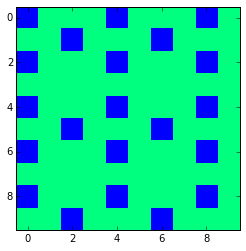

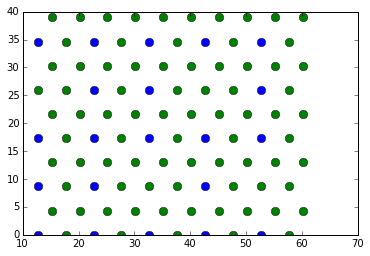

In [28]:
xcopies = 1
ycopies = 1

Nx = 10*xcopies # number of gridpoints in x-direction (carbons)
Ny = 10*ycopies # number of gridpoints in y-direction (carbons)

'''
# We don't use the next lines taken from SamCreationAutomaticDist.ipynb because 
# we replace the oxygens later in the script and 
# therefore DON'T HAVE to define the number of oxygens in each direction

Nxoxy = 5*xcopies # number of oxygens in x-direction 
Nyoxy = 4*ycopies # number of oxygens in y-direction 

Percentage = int(100*Nxoxy*Nyoxy/(float(Nx*Ny)))
print "PERCENTAGE = ", Percentage
'''

a0 = 5.0
#V = (Vx,Vy) first basis vector 
#Vx = a0*np.sin(np.pi/6)
#Vy = a0*np.cos(np.pi/6)
Vx = a0
Vy = 0


print "Vx=",Vx, "Vy=", Vy

# W = (Wx,Wy) second basis vector 
Wx = a0*np.sin(np.pi/6)
Wy = a0*np.cos(np.pi/6)

print "Wx=",Wx, "Wy=", Wy

zPos = 21.680


# create arrays that hold particle positions and types
xPos = np.zeros([Nx,Ny],dtype=float) # x positions of particles
yPos = np.zeros([Nx,Ny],dtype=float) # y positions of particles
pType = np.zeros([Nx,Ny],dtype=str) # particle type
zlastPos = np.zeros([Nx,Ny],dtype=float) # zlastPos ONLY will serve to calculate the box height (z)


# xPos[i,j] = x coordinate of the particle at position [i,j]
# 0 <= i <= Nx
# 0 <= j <= Ny


# set standard particle type
for i in range(Nx):
  for j in range(Ny):
    pType[i,j] = 'C' 


# set particle positions
for j in range(Ny):
    for i in range(Nx):
        xPos[i,j] = i*Vx + j*Wx +12.68
        yPos[i,j] = i*Vy + j*Wy 

for j in range(Ny):
    for i in range(Nx):
        if xPos[i,j]>xPos[-1,1]:
           xPos[i,j] = xPos[i-Nx+1,j-2]

########################### Intervals between Oxygens must be adjusted!!! ########################### 
# exchange particles
#    Get indices of particles to replace:
#xinterval = Nx/Nxoxy  #---> only if Nx/Nxoxy has no remainder
#yinterval = Ny/Nyoxy
#for k in range(0,Nx,xinterval):
    #for l in range(0,Ny,yinterval):
      #pType[k,l] = 'O' 
        
xinterval = 2
yinterval = 1
n = 1
#for k in range(0,Nx,xinterval):
#    for l in range(0,Ny,yinterval):
#        pType[k,l] = 'O' 
#        n = n+1
        
##### LAST TRY ######
n = 0
for k in range(0,Nx,yinterval*2):
    for l in range(0,Ny,xinterval*2):
        pType[k,l] = 'O' 
        n = n+1
for k in range(yinterval,Nx,xinterval*2):
    for l in range(xinterval,Ny,xinterval*2):
        pType[k,l] = 'O' 
        n = n+1
########
print "oxygens",n
print "carbons", Nx*Ny
pc = n/(float(Nx)*float(Ny))
print "pc= ", int(pc*100)
#for k in range(0,Nx,xinterval):
#    for l in range(1,Ny,yinterval):
#        pType[k+2,l] = 'O' 
###################################################################################################

# plot the particle types and positions
#   create array with 0s where there is O
#   and ones where there is C:
Z = np.zeros([Nx,Ny],dtype=int)
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'C':
      Z[i,j] = 1
      
#   plot
#    first we plot the heatmap
fig, ax = plt.subplots()
ax.imshow(Z, cmap=plt.cm.winter, interpolation='nearest')
#fig.savefig('output_' + str(Percentage) + '_heatmap.pdf',format='pdf')

#    then we plot the actual positions
SizeOfDots = 8
fig, ax = plt.subplots()
for i in range(Nx):
  for j in range(Ny):
    if pType[i,j] == 'O':
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='blue')
    else:
      ax.plot([xPos[i,j]],[yPos[i,j]],marker='o',markersize=SizeOfDots,color='green')
#ax.set_xlim(xPos[0,0]-0.5,xPos[-1,-1]+0.5)
#ax.set_ylim(yPos[0,0]-0.5,yPos[-1,-1]+0.5)
plt.show()
#fig.savefig('output_' + str(Percentage) + '_positions.pdf',format='pdf')


In [7]:
# We define the functions needed to write the particle positions along the chains

def writeC(xLength,yLength,zLength,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC):
    atomtype = 'C'
    atomnum=str(atomtype)+str(indexC)
    printline(totalpos, atomnum, chaintype, chainNum,xoldC,yoldC,zoldC) # C
    xnew = xoldC + xLength
    ynew = yoldC + yLength
    znew = zoldC + zLength
    totalpos = totalpos + 1
    indexC = indexC + 1
    return xnew,ynew,znew,totalpos,indexC
    
def writeH(xLength,yLength,zLength,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH):
    atomtype = 'H'
    atomnum=str(atomtype)+str(indexH)
    xnew = xoldC + xLength
    ynew = yoldC + yLength
    znew = zoldC + zLength
    printline(totalpos, atomnum, chaintype, chainNum, xnew,ynew,znew) #H 
    totalpos = totalpos + 1
    indexH = indexH + 1
    return totalpos,indexH
    
def writeO(xLength,yLength,zLength,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexO): 
    atomtype = 'O'
    atomnum=str(atomtype)+str(indexO)
    printline(totalpos, atomnum, chaintype, chainNum, xoldC,yoldC,zoldC)  # O
    xnew = xoldC + xLength
    ynew = yoldC + yLength
    znew = zoldC + zLength
    totalpos = totalpos + 1
    indexC = indexO + 1
    return xnew,ynew,znew,totalpos,indexO
def writeOH(chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexO,indexH):
    ####### OXYGEN ######
    xnew,ynew,znew,totalpos,indexO = writeO(xLengthCO,yLengthCO,zLengthCO,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexO)
    ####### H1 ######
    totalpos,indexH = writeH(xLengthOH,yLengthOH,zLengthOH,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    
    return xnew,ynew,znew,totalpos,indexO,indexH

def writeCHa(chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC,indexH):
    
    ####### CARBON ######
    xnew,ynew,znew,totalpos,indexC = writeC(xLengthCCb,yLengthCCb,zLengthCCb,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC)
    ####### H1 ######
    totalpos,indexH = writeH(xLengthCH1a,yLengthCH1a,zLengthCH1a,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    #Second H atom (H2)
    totalpos,indexH = writeH(xLengthCH2a,yLengthCH2a,zLengthCH2a,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
            
    return xnew,ynew,znew,totalpos,indexC,indexH
        
def writeCHb(chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC,indexH):
    
    ####### CARBON ######
    xnew,ynew,znew,totalpos,indexC = writeC(xLengthCCa,yLengthCCa,zLengthCCa,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC)
    ####### H1 ######
    totalpos,indexH = writeH(xLengthCH1b,yLengthCH1b,zLengthCH1b,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    ####### H2 ######
    totalpos,indexH = writeH(xLengthCH2b,yLengthCH2b,zLengthCH2b,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
            
    return xnew,ynew,znew,totalpos,indexC,indexH


def writeCHBOTTOM(chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC,indexH):
    
    ####### CARBON ######
    xnew,ynew,znew,totalpos,indexC = writeC(xLengthCCb,yLengthCCb,zLengthCCb,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC)
    ####### H1 ######
    totalpos,indexH = writeH(xLengthCH1a,yLengthCH1a,zLengthCH1a,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    ####### H2 ######
    totalpos,indexH = writeH(xLengthCH2a,yLengthCH2a,zLengthCH2a,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    ####### H3 ######
    totalpos,indexH = writeH(xLengthCHBOTTOM,yLengthCHBOTTOM,zLengthCHBOTTOM,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
                        
    return xnew,ynew,znew,totalpos,indexC,indexH

def writeCHTOP(chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC,indexH):
    
    ####### CARBON ######
    xnew,ynew,znew,totalpos,indexC = writeC(xLengthCCb,yLengthCCb,zLengthCCb,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexC)
    ####### H1 ######
    totalpos,indexH = writeH(xLengthCH1b,yLengthCH1a,zLengthCH1a,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    ####### H2 ######
    totalpos,indexH = writeH(xLengthCH2b,yLengthCH2a,zLengthCH2a,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
    ####### H3 ######
    totalpos,indexH = writeH(xLengthCHTOP,yLengthCHTOP,zLengthCHTOP,chaintype,chainNum,xoldC,yoldC,zoldC,totalpos,indexH)
            
    return xnew,ynew,znew,totalpos,indexC,indexH


In [29]:
# Testing
print xPos.max()-xPos.min()
print yPos.max()-yPos.min()
xbox = round(xPos.max()-xPos.min()+(a0*0.5),3)
ybox = round(yPos.max()-yPos.min()+Wy,3)
zbox = round(zPos,3)-zlastPos.min() #zlastPos doesn't get a value until the end of this cell => run 2 times!
print xbox, ybox, zbox

47.5
38.9711431703
50.0 43.301 21.68


In [15]:
# WARNING!!!! THIS CELL HAS TO RUN 2 TIMES TO GET THE CORRECT VALUES (see comment of zbox)

%cd /Users/burbol2/Desktop/
#############################################  PDB FILE WRITTING    ###################################################
xbox = round(xPos.max()-xPos.min()+(a0*0.5),3)
ybox = round(yPos.max()-yPos.min()+Wy,3)
zbox = round(zPos,3)-zlastPos.min() #zlastPos doesn't get a value until the end of this cell => run 2 times!
title = 'sam ' + str(int(pc*100)) + '% OH-coverage'
f = open('start' + str(int(pc*100)) + '.pdb','w')
# save the particle types and positions
f.write('TITLE     ' + title + '\n')
f.write('REMARK    THIS IS A SIMULATION BOX' + '\n')
f.write("CRYST1  %3.3f  %3.3f  %3.3f  90.00  90.00  90.00 P 1           1"%(xbox,ybox,zbox) + '\n')
f.write('MODEL        1' + '\n')
    
def printline(totalpos, atomnum, chaintype, chainNum, x, y, z):
    occupancy=1.00
    temp=0.00
    # save the particle types and positions
    f.write( "%-6s%5d %4s%1s%3s %1s%4d%1s   %8.3f%8.3f%8.3f%6.2f%6.2f          %2s%2s"%("ATOM ", totalpos, atomnum, '',chaintype,'',chainNum,'', x, y, z, occupancy, temp,'','' + '\n'))
    

################# Head Groups  ##################


####  SAMs Head Groups  TOP ####

xLengthCHTOP = -0.90
yLengthCHTOP = 0.00
zLengthCHTOP = +0.41

####  OAM Head Groups  TOP ####

xLengthCO = 0.22
yLengthCO = 0.00
zLengthCO = -1.42

xLengthOH = +0.87
yLengthOH = 0.00
zLengthOH = +0.39    

############## SAM & OAM CHAINS ##############
xLengthCCa = -1.40
yLengthCCa = 0.00
zLengthCCa = -0.64

xLengthCH1a = -0.50
yLengthCH1a = +0.81
zLengthCH1a = +0.29

xLengthCH2a = -0.50
yLengthCH2a = -0.810
zLengthCH2a = +0.29

xLengthCCb = +0.15
yLengthCCb = 0.00
zLengthCCb = -1.53

xLengthCH1b = +0.50
yLengthCH1b = +0.81
zLengthCH1b = -0.29

xLengthCH2b = +0.50
yLengthCH2b = -0.810
zLengthCH2b = -0.29

####  Head Groups  BOTTOM  (a) ####

xLengthCHBOTTOM = 0.10
yLengthCHBOTTOM = 0.00
zLengthCHBOTTOM = -0.99


# We start all the counters
chainlength = 65
totalpos=1
chainNum = 0
indexH = 1
indexC = 1
indexO = 1


# First we write the top Head Group
for i in range(Nx):
  for j in range(Ny):   
        chainNum = chainNum +1
        xoldC= round(xPos[i,j],3)
        yoldC= round(yPos[i,j],3)
        zoldC= zPos
        atomtype = pType[i,j]
        indexC = 1
        indexO = 1        
        indexH = 1
        if atomtype == 'O':    #OXYGEN CHAIN
            chainlength = 63
            chaintype='OAM' 
            xnew,ynew,znew,totalpos,indexO,indexH = writeOH(chaintype,chainNum,xoldC,yoldC,zoldC-zLengthCO,totalpos,indexO,indexH)
            
        elif atomtype == 'C':    #CARBON CHAIN parameters
        #Third H atom (H3)
            chainlength = 65
            chaintype='SAM'
            xnew,ynew,znew,totalpos,indexC,indexH = writeCHTOP(chaintype,chainNum,xoldC,yoldC,zoldC-zLengthCCb,totalpos,indexC,indexH)
            
        #here comes the "body" of the chain
        for d in range(9):
 
            ######### CHb #######
            xnew,ynew,znew,totalpos,indexC,indexH = writeCHb(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)

            ######### CHa #######
            xnew,ynew,znew,totalpos,indexC,indexH = writeCHa(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)

        # At the end of each chain we also write a last CH2 + the Head Group (BOTTOM)
        ######### CHb #######
        xnew,ynew,znew,totalpos,indexC,indexH = writeCHb(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)
        
        ######### CHBottom #######
        xnew,ynew,znew,totalpos,indexC,indexH = writeCHBOTTOM(chaintype,chainNum,xnew,ynew,znew,totalpos,indexC,indexH)

f.close()

/Users/burbol2/Desktop
50.0 43.971 21.68
